## Практикум 5. Задание.

1. Подсчитать число стихов в представленном файле
2. Найти топ-20 по частоте слов, встречающихся в стихах
3. Найти топ-20 по частоте информативных (не предлоги, не мат, т.е. слова описывающий смысл стиха) слов, встречающихся в стихах
4. С помошью регулярных выражений, найти первое слово, встречающееся после имени Олег, во всех стихах.
5. Использовать облако слов, для визуализации п.4.
6. Разделить исходный список на стихи (строка, включающая 4 переноса каретки)
7. Каждый полученный стих из 4. очистить от стоп-слов
8. Векторизовать полученные стихи (каждый стих-строку превратить в вектор, где измерения -все слова, встречавшиеся во всех стихах, а значения в измерениях вектора - это частота этих слов, внутри соответствующего стиха). Таким образом, результат - это матрица стих-слово (документ-терм/токен)
9. С помощью метода главных компонент оставить только два измерения в каждом векторе, и визуализировать стихи с помощью диаграммы рассеяния
10.  С помощью частеречной разметки оставить в стихах только прилагательные и подписать ими каждый стих, на графике из п.9.

In [1]:
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import IncrementalPCA as PCA
from collections import Counter

#### 1. Подсчитать число стихов в представленном файле

In [2]:
with open("data/perazki1.txt", "r") as f:
    data = f.readlines()

In [3]:
data = data[:110484] + data[110484 + 1 :]
data = data[:110489] + data[110489 + 1 :]
data = data[:110494] + data[110494 + 1 :]
data[182232] = "никчёмной болтовней и водкой,\n"
data = data[:182233] + ["презервативом от жены\n"] + data[182233:]

In [4]:
data[:10]

['а где тут руль спросил гагарин\n',
 'деревня буркнул королёв\n',
 'ещё спроси а где тут вожжи\n',
 'ещё поехали скажи\n',
 '\n',
 'вот позитивный анатолий\n',
 'был послан нахуй но сумел\n',
 'вернуться бодрым отдохнувшим\n',
 'и два магнитика привез\n',
 '\n']

In [5]:
data = "".join(data).split("\n\n")
data = [re.sub(r"\n", " ", i) for i in data]
data[:10]

['а где тут руль спросил гагарин деревня буркнул королёв ещё спроси а где тут вожжи ещё поехали скажи',
 'вот позитивный анатолий был послан нахуй но сумел вернуться бодрым отдохнувшим и два магнитика привез',
 'перед оксаной в тёмном парке олег распахивает плащ под ним второй а дальше третий оксана терпеливо ждёт',
 'сегодня ольгой овладели сперва тоска потом олег потом опять олег еще раз и окончательно тоска',
 'а кто не смыл говно ребята негромко произнес олег и сразу стало всем понятно волшебный вечер не вернуть',
 'а любишь ролевые игры тебе кого изобразить изобрази мне человека который только что ушел',
 'сперва жена моя сбежала потом собака и коты сейчас смотрю как трудно рыбкам аквариум толкать к дверям',
 'искусствоведов группа тихо восторженно глядит на холст и вдруг один седой и строгий отчетливо сказал говно',
 'любимый взял меня за локоть подвёл к окну и показал всё то чего я не увижу вовеки если не заткнусь',
 'на покосившемся заборе семен напишет слово жук и детям почита

In [6]:
# Количество стихов
len(data)

38071

#### 2. Найти топ-20 по частоте слов, встречающихся в стихах

In [7]:
words = " ".join(data).split()
Counter(words).most_common(20)

[('и', 29939),
 ('в', 22026),
 ('не', 13506),
 ('на', 12651),
 ('я', 11020),
 ('а', 10740),
 ('с', 7208),
 ('что', 6028),
 ('как', 5432),
 ('но', 4005),
 ('у', 3600),
 ('олег', 3591),
 ('он', 3490),
 ('ты', 3467),
 ('по', 3436),
 ('мне', 3332),
 ('за', 3316),
 ('из', 3186),
 ('то', 3070),
 ('к', 2999)]

#### 3. Найти топ-20 по частоте информативных (не предлоги, не мат, т.е. слова описывающий смысл стиха) слов, встречающихся в стихах

In [8]:
nltk.download("stopwords")
stop_words = set(stopwords.words("russian"))
informative_words = [word for word in words if word.lower() not in stop_words]
informative_word_counts = Counter(informative_words).most_common(20)
informative_word_counts


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mawerid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('олег', 3591),
 ('всё', 1658),
 ('сказал', 1615),
 ('это', 1589),
 ('оксана', 1348),
 ('день', 801),
 ('аркадий', 800),
 ('сегодня', 715),
 ('тебе', 674),
 ('просто', 654),
 ('нам', 652),
 ('лишь', 633),
 ('говорит', 629),
 ('ещё', 623),
 ('люди', 615),
 ('глаза', 605),
 ('олега', 604),
 ('пока', 601),
 ('её', 576),
 ('жизнь', 558)]

#### 4. С помошью регулярных выражений, найти первое слово, встречающееся после имени Олег, во всех стихах.

In [9]:
pattern = re.compile(r"Олег\s+(\w+)", re.IGNORECASE)
matches = pattern.findall(" ".join(data))
matches[:10]

['распахивает',
 'потом',
 'еще',
 'и',
 'потеет',
 'один',
 'сидящий',
 'несёт',
 'не',
 'уволился']

#### 5. Использовать облако слов, для визуализации п.4.

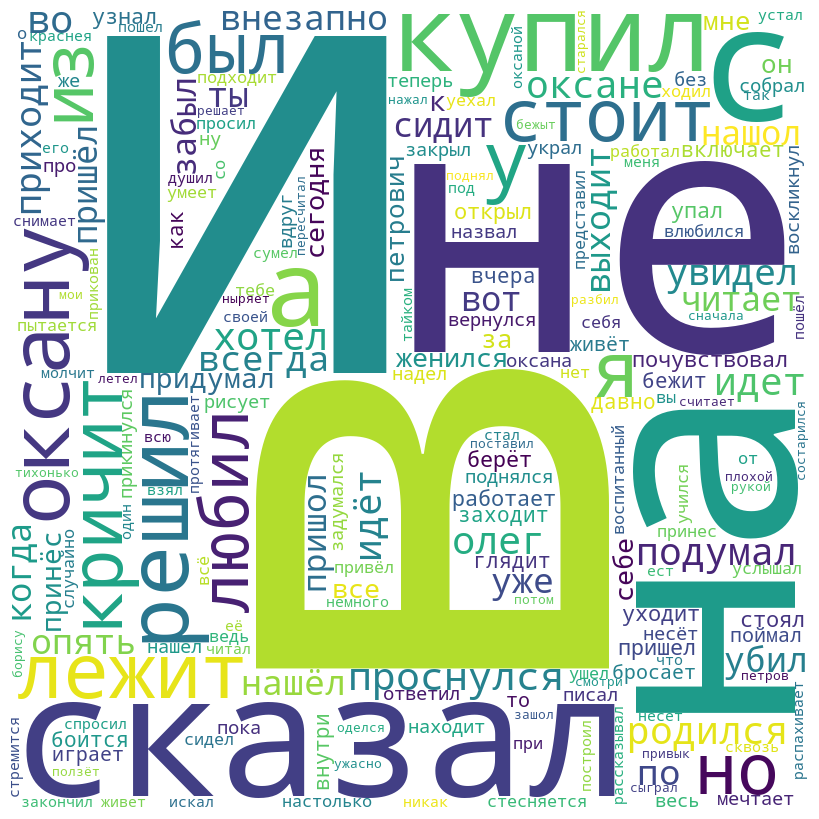

In [10]:
wordcloud = WordCloud(
    width=800,
    height=800,
    background_color="white",
    min_font_size=10,
).generate(" ".join(matches))

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


#### 6. Разделить исходный список на стихи (строка, включающая 4 переноса каретки)

In [11]:
# Done
data

['а где тут руль спросил гагарин деревня буркнул королёв ещё спроси а где тут вожжи ещё поехали скажи',
 'вот позитивный анатолий был послан нахуй но сумел вернуться бодрым отдохнувшим и два магнитика привез',
 'перед оксаной в тёмном парке олег распахивает плащ под ним второй а дальше третий оксана терпеливо ждёт',
 'сегодня ольгой овладели сперва тоска потом олег потом опять олег еще раз и окончательно тоска',
 'а кто не смыл говно ребята негромко произнес олег и сразу стало всем понятно волшебный вечер не вернуть',
 'а любишь ролевые игры тебе кого изобразить изобрази мне человека который только что ушел',
 'сперва жена моя сбежала потом собака и коты сейчас смотрю как трудно рыбкам аквариум толкать к дверям',
 'искусствоведов группа тихо восторженно глядит на холст и вдруг один седой и строгий отчетливо сказал говно',
 'любимый взял меня за локоть подвёл к окну и показал всё то чего я не увижу вовеки если не заткнусь',
 'на покосившемся заборе семен напишет слово жук и детям почита

#### 7. Каждый полученный стих из 4. очистить от стоп-слов

In [12]:
clear_data = []
for poem in data:
    clear_poem = [word for word in poem.split() if word.lower() not in stop_words]
    clear_data.append(" ".join(clear_poem))

clear_data[:10]

['руль спросил гагарин деревня буркнул королёв ещё спроси вожжи ещё поехали скажи',
 'позитивный анатолий послан нахуй сумел вернуться бодрым отдохнувшим магнитика привез',
 'оксаной тёмном парке олег распахивает плащ второй дальше третий оксана терпеливо ждёт',
 'сегодня ольгой овладели сперва тоска олег олег окончательно тоска',
 'смыл говно ребята негромко произнес олег сразу стало всем понятно волшебный вечер вернуть',
 'любишь ролевые игры тебе кого изобразить изобрази человека который ушел',
 'сперва жена сбежала собака коты смотрю трудно рыбкам аквариум толкать дверям',
 'искусствоведов группа тихо восторженно глядит холст седой строгий отчетливо сказал говно',
 'любимый взял локоть подвёл окну показал всё увижу вовеки заткнусь',
 'покосившемся заборе семен напишет слово жук детям почитать стыдно взрослым пища ума']

#### 8. Векторизовать полученные стихи (каждый стих-строку превратить в вектор, где измерения -все слова, встречавшиеся во всех стихах, а значения в измерениях вектора - это частота этих слов, внутри соответствующего стиха). Таким образом, результат - это матрица стих-слово (документ-терм/токен)

In [13]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(clear_data)

X_array = X.toarray()

print(X_array.shape)
print(X_array[:5])


(38071, 84001)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### 9. С помощью метода главных компонент оставить только два измерения в каждом векторе, и визуализировать стихи с помощью диаграммы рассеяния

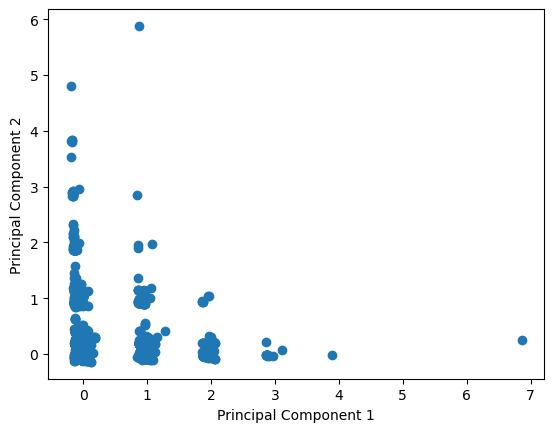

In [14]:
pca = PCA(n_components=2)
batch_size = 1000
for i in range(0, X_array.shape[0], batch_size):
    batch = X_array[i : i + batch_size]
    pca.partial_fit(batch)

X_pca = np.array([])
for i in range(0, X_array.shape[0], batch_size):
    batch = X_array[i : i + batch_size]
    transformed_batch = pca.transform(batch)
    X_pca = np.vstack([X_pca, transformed_batch]) if X_pca.size else transformed_batch

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#### 10.  С помощью частеречной разметки оставить в стихах только прилагательные и подписать ими каждый стих, на графике из п.9.

[nltk_data] Downloading package averaged_perceptron_tagger_rus to
[nltk_data]     /home/mawerid/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_rus is already up-to-
[nltk_data]       date!


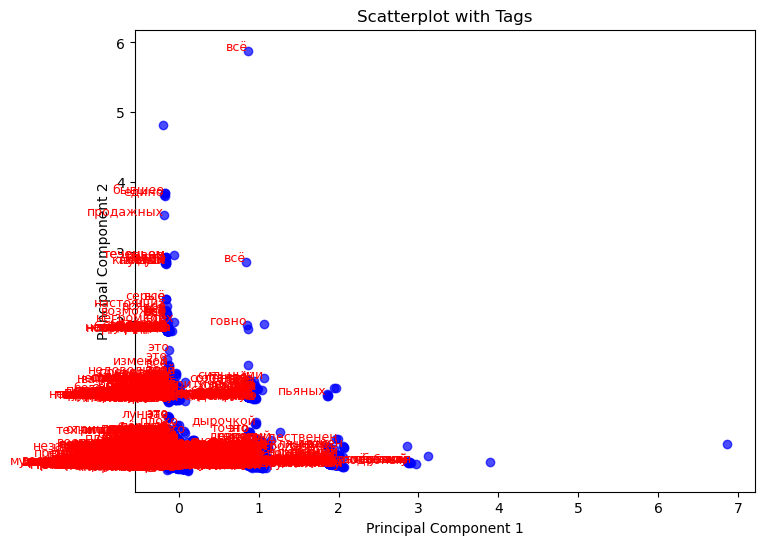

In [24]:
nltk.download("averaged_perceptron_tagger_rus")
tagged_data = [nltk.pos_tag(poem.split(), lang="rus") for poem in clear_data]

adjectives = []
for poem in tagged_data:
    adj_poem = [
        word
        for word, tag in poem
        if tag[0] == "A" and tag[:3] != "ADV" and tag not in ["A=comp", "A=comp2"]
    ]
    if adj_poem:
        adjectives.append(adj_poem[0])
    else:
        adjectives.append("")

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color="blue", alpha=0.7)

for i, tag in enumerate(adjectives):
    plt.text(X_pca[i, 0], X_pca[i, 1], tag, fontsize=9, ha="right", color="red")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Scatterplot with Tags")
plt.show()